In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

# sns.set_style("ticks")
sns.set_style("white")
# sns.set_style("whitegrid")

In [3]:
photoz_table = pd.read_csv("tables_photozs/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'r_petro', 
                                                                           'odds', 'PROB_GAL'])

specz_table = pd.read_csv("tables_speczs/SpecZ_Catalogue_20220701.csv", usecols=['RA', 'DEC', 'z', 'class'])

# specz_table = pd.read_csv("tables_speczs/hydra_specz.csv", usecols=['RA_1', 'DEC_1', 'z', 'r_petro', 'PROB_GAL'])

/home/elismar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
ra_pz = photoz_table["RA"]
dec_pz = photoz_table["DEC"]
zml = photoz_table["zml"]
rpetro_pz = photoz_table["r_petro"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]

ra_sz = specz_table["RA"]
dec_sz = specz_table["DEC"]
z = specz_table["z"]
obj_class = specz_table["class"]

In [10]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances_pz = dist(ra_pz, dec_pz)
distances_sz = dist(ra_sz, dec_sz)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for ax, mlim in zip(axs.ravel(), [16, 17, 18, 19, 20, 21]):
    mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim)
    mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim)
    
    zml[mask_pz].hist(ax=ax, alpha=0.6, label='Photo-z', bins=50, histtype='stepfilled')
    z[mask_sz].hist(ax=ax, alpha=0.6, label='Spec-z', bins=50, histtype='stepfilled')
    
    ax.set_title("r_petro < {:.1f}".format(mlim), fontsize=25)
    ax.set_xlabel("Redshift", fontsize=25)
    ax.set_ylabel("Number of objects", fontsize=25)
    
    ax.yaxis.set_tick_params(labelsize=20, width=3)
    ax.xaxis.set_tick_params(labelsize=20, width=3)
    
    ax.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
    ax.axvline(x=0.025, linestyle='--', color='navy', linewidth=3.0)

fig.tight_layout()
plt.savefig("Plot-speczs-photozs.pdf", format='pdf')

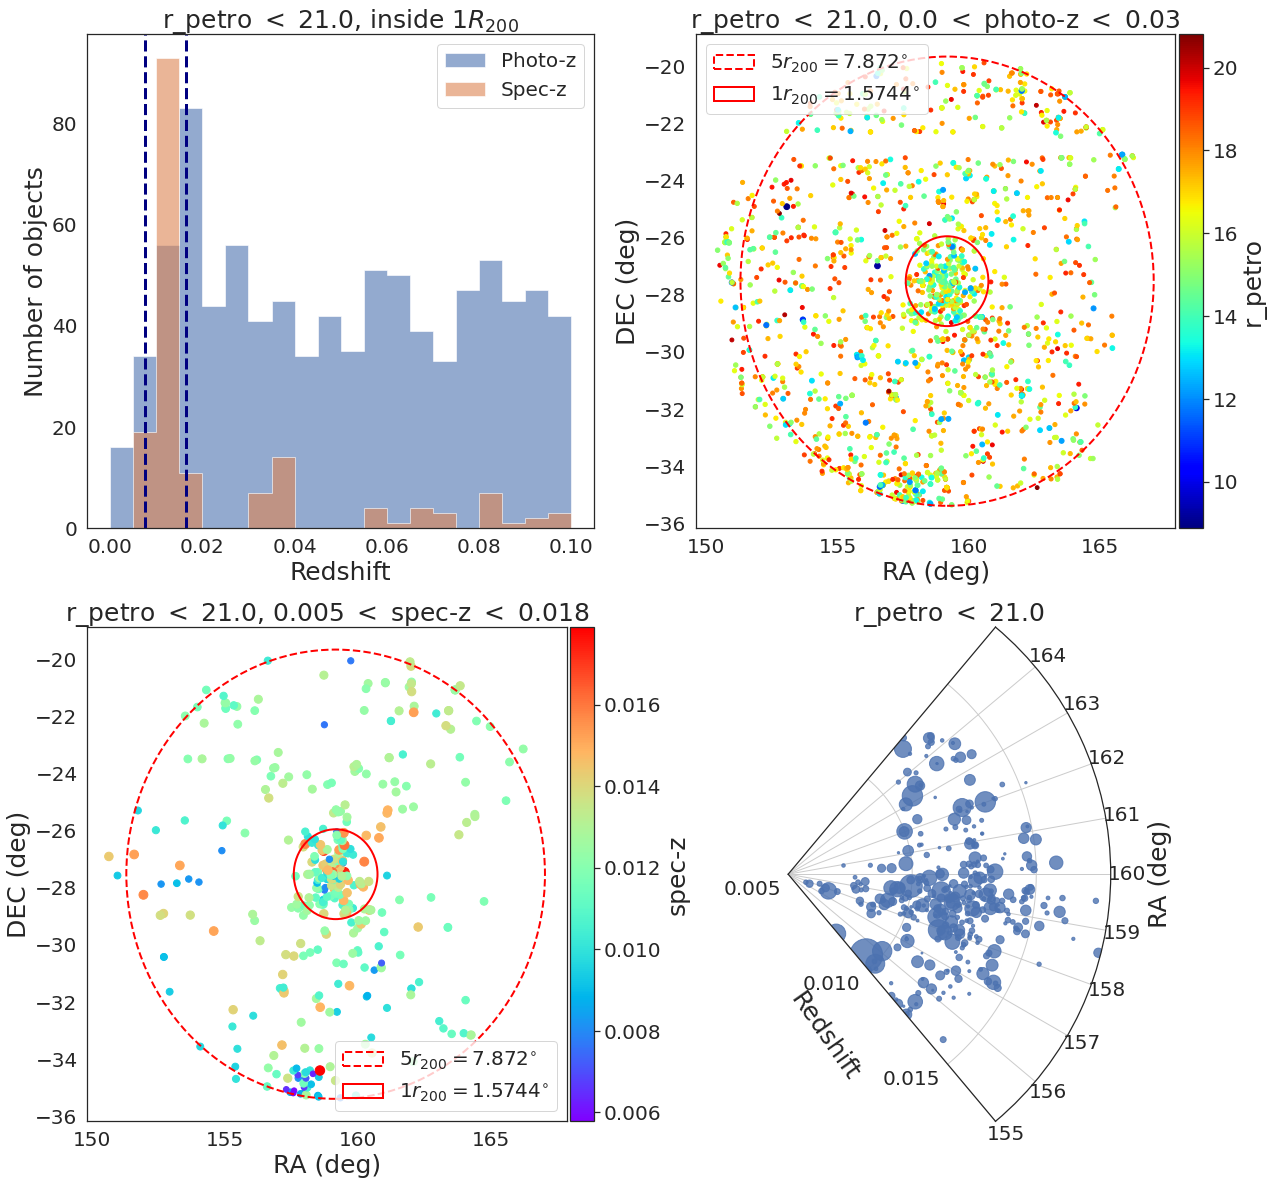

In [6]:
mlim = 21
odds_min = 0.7
z_range = 0.018
prob_gal = 0.8

fontsize = 25
labelsize = 20

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224, projection='polar')


#======================================
#First figure: histogram of redshifts
#======================================

#Pra cada plot eu defino essas "masks", que são os critérios pra selecionar os dados que quero plotar
mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim) & (odds 
                                                                                > odds_min) & (prob_gal > 0.8)
mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim) & (probgal_sz > 0.8)


ax1.hist(zml[mask_pz], alpha=0.6, label='Photo-z', bins=20, range=(0, 0.1), histtype='stepfilled')
ax1.hist(z[mask_sz], alpha=0.6, label='Spec-z', bins=20, range=(0, 0.1), histtype='stepfilled')
ax1.set_title(r'r_petro $ < $ {:.1f},'.format(mlim) + r' inside 1$R_{200}$', fontsize=fontsize)
ax1.set_xlabel("Redshift", fontsize=fontsize)
ax1.set_ylabel("Number of objects", fontsize=fontsize)
ax1.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
ax1.axvline(x=0.0165, linestyle='--', color='navy', linewidth=3.0)
ax1.legend(fontsize=fontsize*0.8)


#======================================
#Second figure: RA x DEC distribution
#======================================

mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min) & (prob_gal > 0.8)

sc1 = ax2.scatter(x=ra_pz[mask], y=dec_pz[mask], c=rpetro_pz[mask], cmap=cm1, s=(1/rpetro_pz[mask])*300)
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)
ax2.set_title(r"r_petro $<$ {:.1f}, 0.0 $<$ photo-z $<$ 0.03".format(mlim), fontsize=fontsize)

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_petro", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax2.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax2.add_patch(OneR200)

ax2.legend(fontsize=fontsize*0.8)

#======================================
#Third figure: RA x DEC distribution
#======================================

mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > 0.8)

sc1 = ax3.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax3.set_ylabel("DEC (deg)", fontsize=fontsize)
ax3.set_xlabel("RA (deg)", fontsize=fontsize)
ax3.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax3)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax3.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax3.add_patch(OneR200)

ax3.legend(fontsize=fontsize*0.8)


#======================================
#Fourth figure: cone diagram in R.A.
#======================================

# Scale factor
sf = 10

mask_sz2 = (rpetro_sz < mlim) & (probgal_sz > 0.8)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax4.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax4.set_ylim(0.005, z_range)
ax4.set_yticks(np.arange(0.0050, z_range, 0.005))
ax4.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180)
ax4.set_xticklabels(np.arange(155,  165, 1))
ax4.set_theta_offset(sf*200*np.pi/180) # This offset is here to change the position of the slice
ax4.set_thetamax(sf*165)
ax4.set_thetamin(sf*155)

ax4.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax4.get_rlabel_position()
ax4.text(np.radians(label_position+60), ax4.get_rmax()*0.65,'Redshift', 
             rotation=-55, ha='center',va='center', fontsize=fontsize)
ax4.text(160*np.pi/180, z_range+0.002, 'RA (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax4.grid(True)

#======================================
#Global stuff
#======================================

for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
    ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
    
    
# fig.tight_layout()
# plt.savefig("../Figures/z_raxdec_cone_mlim{:.1f}-v3.pdf".format(mlim), format='pdf')    

In [80]:
#Position of brightest ""galaxies"" on the ax1 plot
mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min)# & (prob_gal > 0.9)

i = np.isin(rpetro_pz, np.sort(np.array(rpetro_pz[mask]))[:10])

photoz_table[["RA", "DEC", "r_petro", "PROB_GAL", "PROB_STAR"]][i].sort_values(by="r_petro")

,RA,DEC,r_petro,PROB_GAL,PROB_STAR
147462,158.504124,-23.743016,5.401323,0.77,0.22
184154,161.889016,-31.601225,6.489481,0.77,0.22
187919,161.266401,-29.684732,7.131208,0.77,0.22
105722,154.658625,-32.538048,7.257348,0.77,0.22
68494,156.108248,-25.564828,7.458511,0.77,0.22
43267,157.390155,-32.942840,7.573067,0.77,0.22
138395,160.906760,-30.868513,7.604758,0.77,0.22
225246,163.118863,-33.654558,7.628982,0.77,0.23
64255,159.969351,-33.609716,7.689562,0.77,0.22
183971,162.324251,-31.504399,7.805068,0.72,0.27


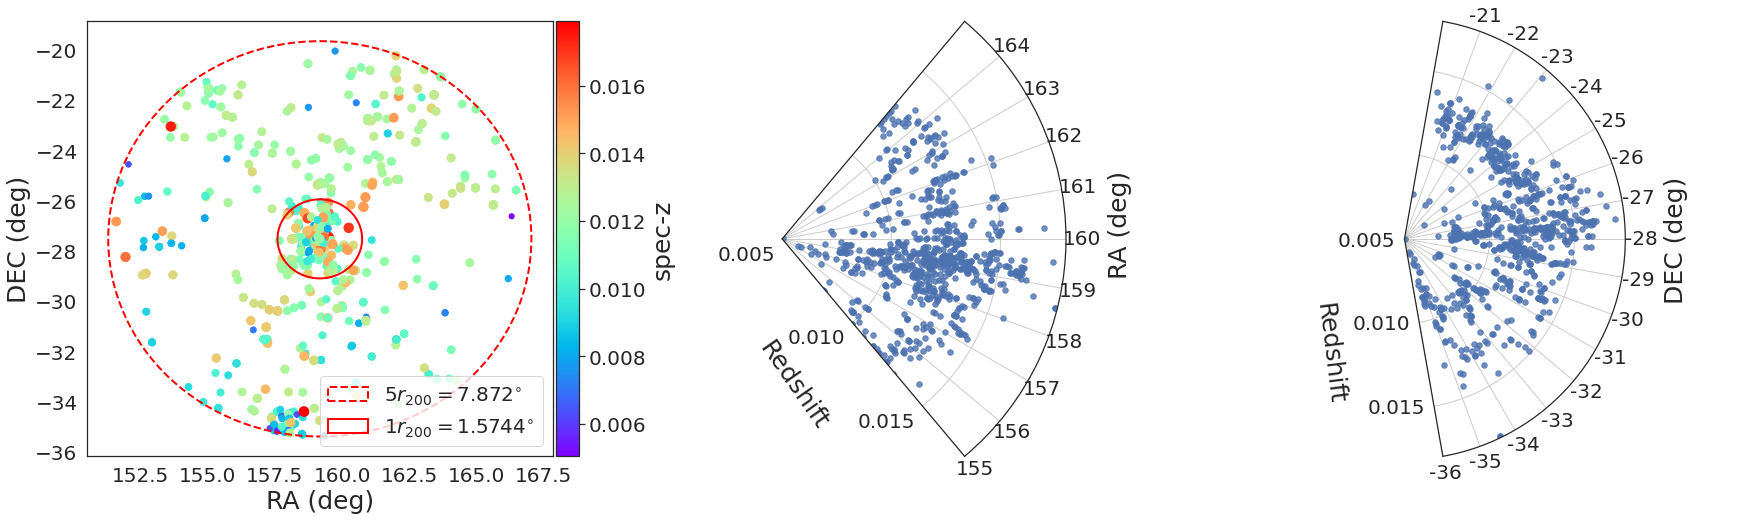

In [22]:
mlim = 19
z_range = 0.018

fontsize = 25
labelsize = 20

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection='polar')
ax3 = fig.add_subplot(133, projection='polar')

#======================================
#First figure: RA x DEC distribution 
#======================================

# mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > 0.8)
mask = (z > 0.005) & (z < z_range) & (obj_class == "GALAXY") & (distances_sz < 5*radius)

sc1 = ax1.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax1.set_ylabel("DEC (deg)", fontsize=fontsize)
ax1.set_xlabel("RA (deg)", fontsize=fontsize)
# ax1.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax1.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax1.add_patch(OneR200)

ax1.legend(fontsize=fontsize*0.8)

#======================================
#Second figure: Cone diagram in R.A.
#======================================

# Scale factor
sf = 10

# mask_sz2 = (rpetro_sz < mlim) & (probgal_sz > 0.8)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
# ax2.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)
ax2.scatter(sf*ra_sz[mask]*np.pi/180, z[mask], s=30.0, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax2.set_ylim(0.005, z_range)
ax2.set_yticks(np.arange(0.0050, z_range, 0.005))
ax2.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180)
ax2.set_xticklabels(np.arange(155,  165, 1))
ax2.set_theta_offset(sf*200*np.pi/180) # This offset is here to change the position of the slice
ax2.set_thetamax(sf*165)
ax2.set_thetamin(sf*155)

# ax2.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax2.get_rlabel_position()
ax2.text(np.radians(label_position+52), ax2.get_rmax()*0.65,'Redshift', 
             rotation=-55, ha='center',va='center', fontsize=fontsize)
ax2.text(np.radians(label_position+140), z_range+0.0025, 'RA (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax2.grid(True)

#======================================
#Third figure: Cone diagram in DEC
#======================================

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
# ax3.scatter(sf*dec_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)
ax3.scatter(sf*dec_sz[mask]*np.pi/180, z[mask], s=30.0, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax3.set_ylim(0.005, z_range)
ax3.set_yticks(np.arange(0.0050, z_range, 0.005))
ax3.set_xticks(sf*np.arange(-36,  -20, 1)*np.pi/180)
ax3.set_xticklabels(np.arange(-36, -20, 1))
ax3.set_theta_offset(sf*28*np.pi/180) # This offset is here to change the position of the slice
ax3.set_thetamax(sf*-20)
ax3.set_thetamin(sf*-36)

# ax3.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax3.get_rlabel_position()
ax3.text(-0.24*np.pi, 0.013,'Redshift', 
             rotation=-83, ha='center',va='center', fontsize=fontsize)
ax3.text(np.radians(label_position)+1.0, 0.021, 'DEC (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax3.grid(True)

#======================================
#Global stuff
#======================================

for ax in [ax1, ax2, ax3]:
    ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
    ax.xaxis.set_tick_params(labelsize=labelsize, width=3)
    
plt.savefig("../Figures/raxdec_coneRA&DEC.png", format='png')     

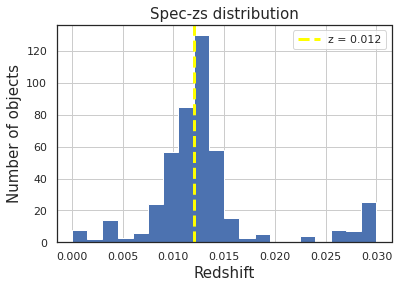

In [19]:
fontsize=15

mask = (z > 0.0) & (z < 0.03)
plt.hist(z[mask], bins=20, histtype='stepfilled')
plt.axvline(x=0.012, linestyle='--', color='yellow', linewidth=3.0, label="z = 0.012")
plt.title('Spec-zs distribution', fontsize=fontsize)
plt.xlabel("Redshift", fontsize=fontsize)
plt.ylabel("Number of objects", fontsize=fontsize)
plt.legend()
plt.grid()

# Individual plots

In [6]:
mlim = 19
odds_min = 0.7
z_range = 0.018

fontsize = 30
labelsize = 25

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

## Distribution of redshifts

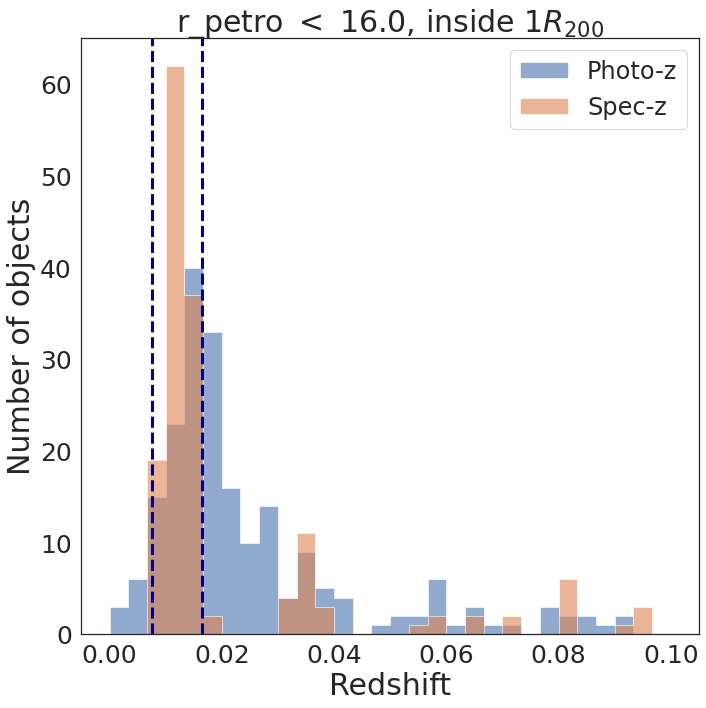

In [6]:
mlim = 16
odds_min = 0.7
z_range = 0.018

fontsize = 30
labelsize = 25

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

#==========================================================

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

#Pra cada plot eu defino essas "masks", que são os critérios pra selecionar os dados que quero plotar
mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim) & (odds 
                                                                                > odds_min) & (prob_gal > 0.8)
mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim) & (probgal_sz > 0.8)

ax1.hist(zml[mask_pz], alpha=0.6, label='Photo-z', bins=30, range=(0, 0.1), histtype='stepfilled')
ax1.hist(z[mask_sz], alpha=0.6, label='Spec-z', bins=30, range=(0, 0.1), histtype='stepfilled')
ax1.set_title(r'r_petro $ < $ {:.1f},'.format(mlim) + r' inside 1$R_{200}$', fontsize=fontsize)
ax1.set_xlabel("Redshift", fontsize=fontsize)
ax1.set_ylabel("Number of objects", fontsize=fontsize)
ax1.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
ax1.axvline(x=0.0165, linestyle='--', color='navy', linewidth=3.0)
ax1.legend(fontsize=fontsize*0.8)

ax1.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax1.xaxis.set_tick_params(labelsize=labelsize, width=3)

fig.tight_layout()
# plt.savefig("../Presentations/cosmo22-splus-poster/redshifts-distribution_m{:2d}.png".format(mlim), format='png')   

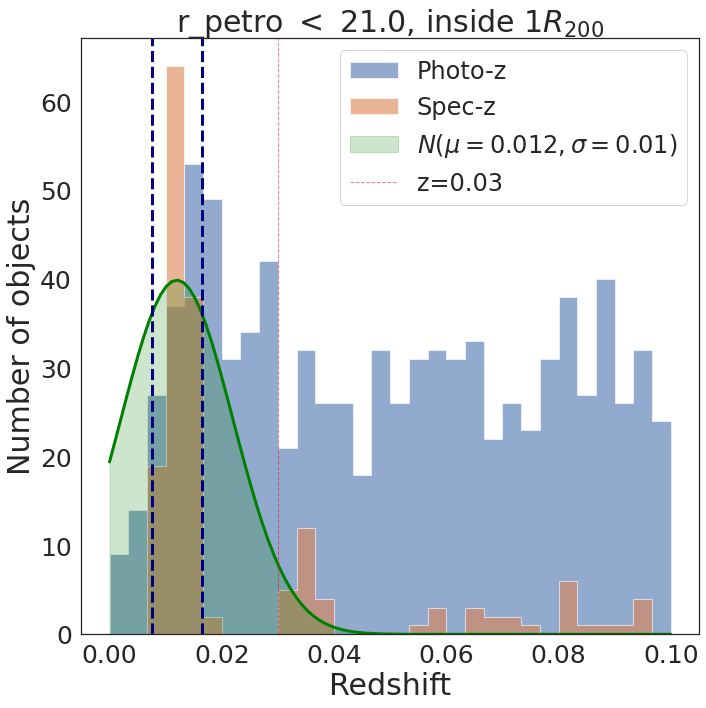

In [11]:
from scipy.stats import norm

x_axis = np.linspace(0, 0.1, 100)
mean = 0.012
sd = 0.01

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

#Pra cada plot eu defino essas "masks", que são os critérios pra selecionar os dados que quero plotar
mlim = 21
odds_min = 0.7
z_range = 0.018

fontsize = 30
labelsize = 25

mask_pz = (distances_pz < radius) & (zml > 0.0) & (zml < 0.1) & (rpetro_pz < mlim) & (odds 
                                                                                > odds_min) & (prob_gal > 0.8)
mask_sz = (distances_sz < radius) & (z > 0.0) & (z < 0.1) & (rpetro_sz < mlim) & (probgal_sz > 0.8)

ax1.hist(zml[mask_pz], alpha=0.6, label='Photo-z', bins=30, range=(0, 0.1), histtype='stepfilled')
ax1.hist(z[mask_sz], alpha=0.6, label='Spec-z', bins=30, range=(0, 0.1), histtype='stepfilled')
ax1.fill_between(x_axis, norm.pdf(x_axis, mean, sd), color="green", alpha=0.2, label=r"$N(\mu = 0.012, \sigma=0.01)$")
ax1.plot(x_axis, norm.pdf(x_axis, mean, sd), color="green", linewidth=3.0)

ax1.set_title(r'r_petro $ < $ {:.1f},'.format(mlim) + r' inside 1$R_{200}$', fontsize=fontsize)
ax1.set_xlabel("Redshift", fontsize=fontsize)
ax1.set_ylabel("Number of objects", fontsize=fontsize)
ax1.axvline(x=0.0075, linestyle='--', color='navy', linewidth=3.0)
ax1.axvline(x=0.0165, linestyle='--', color='navy', linewidth=3.0)
ax1.axvline(x=0.03, linestyle='--', color='red', linewidth=1.0, alpha=0.5, label="z=0.03")
ax1.legend(fontsize=fontsize*0.8)

ax1.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax1.xaxis.set_tick_params(labelsize=labelsize, width=3)

fig.tight_layout()
plt.savefig("../Presentations&reports/cosmo22-splus-poster/redshifts-distribution_gaussian_m{:2d}.png".format(mlim), format='png')

## RA x DEC x r_petro

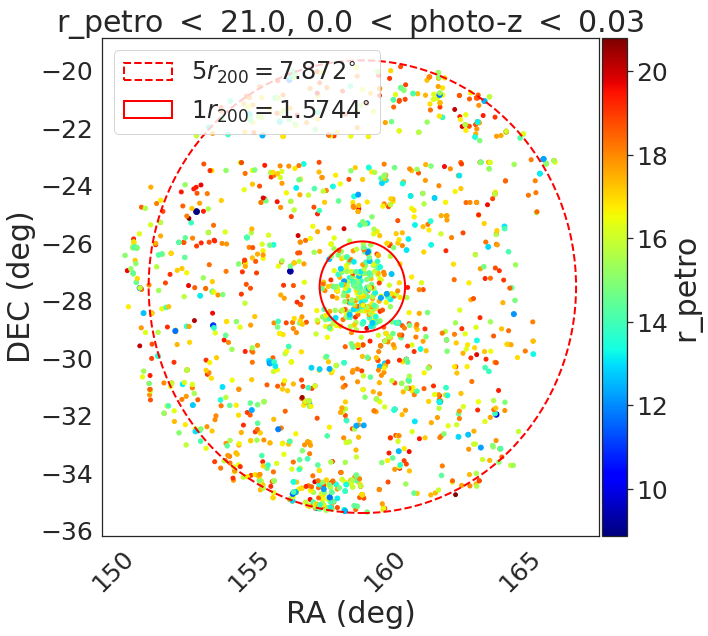

In [19]:
mlim = 21
odds_min = 0.7
z_range = 0.018

fontsize = 30
labelsize = 25

from mpl_toolkits.axes_grid1 import make_axes_locatable
cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')

#==========================================================

fig = plt.figure(figsize=(10, 9))
ax2 = fig.add_subplot(111)

mask = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min) & (prob_gal > 0.8)

sc1 = ax2.scatter(x=ra_pz[mask], y=dec_pz[mask], c=rpetro_pz[mask], cmap=cm1, s=(1/rpetro_pz[mask])*300)
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)
ax2.set_title(r"r_petro $<$ {:.1f}, 0.0 $<$ photo-z $<$ 0.03".format(mlim), fontsize=fontsize)

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_petro", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax2.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax2.add_patch(OneR200)

ax2.legend(fontsize=fontsize*0.8)
ax2.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax2.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

fig.tight_layout()
plt.savefig("../Presentations/cosmo22-splus-poster/RAxDECxr_petro_m{:2d}.png".format(mlim), format='png') 

## RA x DEC x spec-z

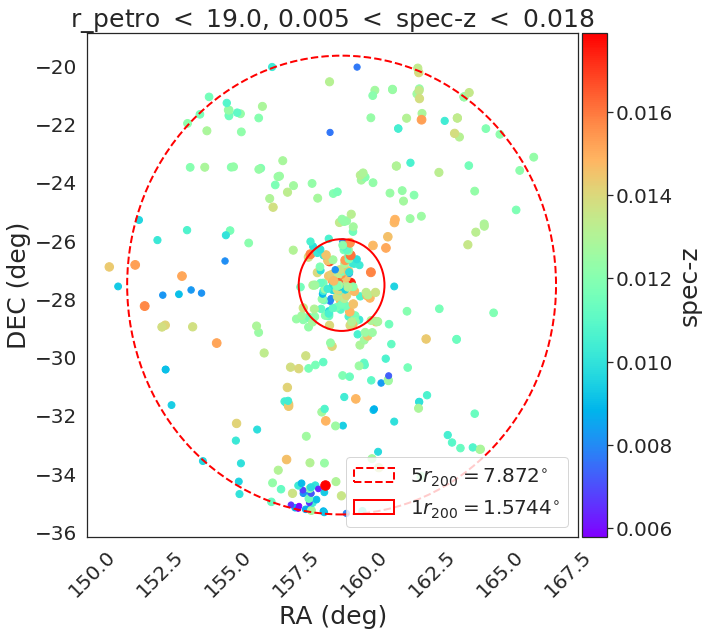

In [36]:
fig = plt.figure(figsize=(10, 9))
ax3 = fig.add_subplot(111)

mask = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > 0.8)

sc1 = ax3.scatter(x=ra_sz[mask], y=dec_sz[mask], c=z[mask], cmap=cm2, s=(z[mask])*5e3)
ax3.set_ylabel("DEC (deg)", fontsize=fontsize)
ax3.set_xlabel("RA (deg)", fontsize=fontsize)
ax3.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

divider = make_axes_locatable(ax3)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="spec-z", fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax3.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax3.add_patch(OneR200)

ax3.legend(fontsize=fontsize*0.8)
ax3.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax3.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

fig.tight_layout()
plt.savefig("../Presentations/cosmo22-splus-poster/RAxDECxspecz.png".format(mlim), format='png') 

## Cone diagram in RA

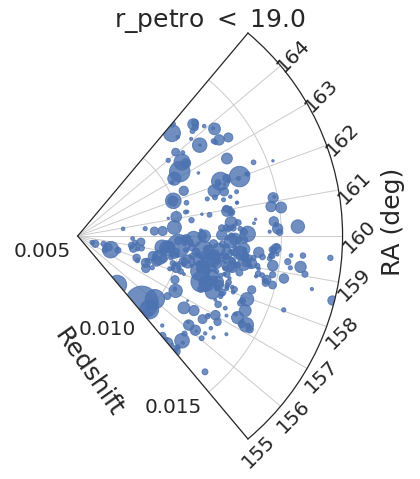

In [47]:
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='polar')

# Scale factor
sf = 10

mask_sz2 = (rpetro_sz < mlim) & (probgal_sz > 0.8)

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax2.scatter(sf*ra_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax2.set_ylim(0.005, z_range)
ax2.set_yticks(np.arange(0.0050, z_range, 0.005))
ax2.set_xticks(sf*np.arange(155,  165, 1)*np.pi/180)
ax2.set_xticklabels(np.arange(155,  165, 1))
ax2.set_theta_offset(sf*200*np.pi/180) # This offset is here to change the position of the slice
ax2.set_thetamax(sf*165)
ax2.set_thetamin(sf*155)

ax2.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.0)


label_position=ax2.get_rlabel_position()
ax2.text(np.radians(label_position+52), ax2.get_rmax()*0.65,'Redshift', 
             rotation=-55, ha='center',va='center', fontsize=fontsize)
ax2.text(np.radians(label_position+140), z_range+0.0025, 'RA (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax2.grid(True)

ax2.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax2.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

fig.tight_layout()
plt.savefig("../Presentations/cosmo22-splus-poster/cone-diagram-RA.png".format(mlim), format='png')

## Cone diagram in DEC

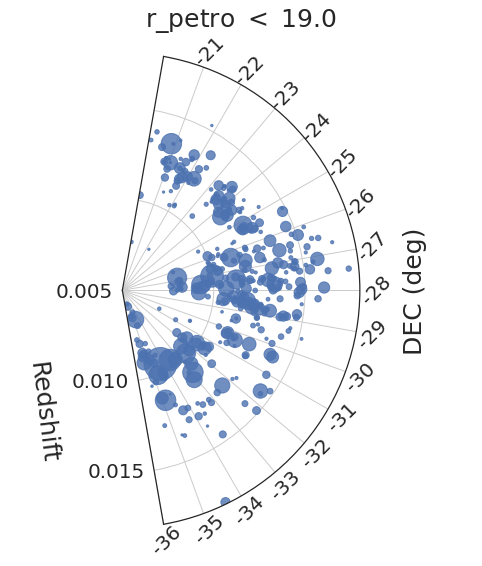

In [38]:
fig = plt.figure(figsize=(8, 8))
ax3 = fig.add_subplot(111, projection='polar')

# Scatterplot of the data on polar coordinates (theta in radians (this is the reason for the *np.pi/180) and r)
ax3.scatter(sf*dec_sz[mask_sz2]*np.pi/180, z[mask_sz2], s=10**(-0.4*rpetro_sz[mask_sz2])*2e7, alpha=0.8)

# Setting limits and ticks for the axes (the y-axis is the r-axis)
ax3.set_ylim(0.005, z_range)
ax3.set_yticks(np.arange(0.0050, z_range, 0.005))
ax3.set_xticks(sf*np.arange(-36,  -20, 1)*np.pi/180)
ax3.set_xticklabels(np.arange(-36, -20, 1))
ax3.set_theta_offset(sf*28*np.pi/180) # This offset is here to change the position of the slice
ax3.set_thetamax(sf*-20)
ax3.set_thetamin(sf*-36)

ax3.set_title(r"r_petro $<$ {:.1f}".format(mlim), fontsize=fontsize, y=1.05)


label_position=ax3.get_rlabel_position()
ax3.text(-0.24*np.pi, 0.013,'Redshift', 
             rotation=-83, ha='center',va='center', fontsize=fontsize)
ax3.text(np.radians(label_position)+1.0, 0.021, 'DEC (deg)', ha='center', va='center', rotation=90, fontsize=fontsize)
ax3.grid(True)

ax3.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax3.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=45)

fig.tight_layout()
plt.savefig("../Presentations/cosmo22-splus-poster/cone-diagram-DEC.png".format(mlim), format='png')

## Plot RA x DEC x photo-z & spec-z 

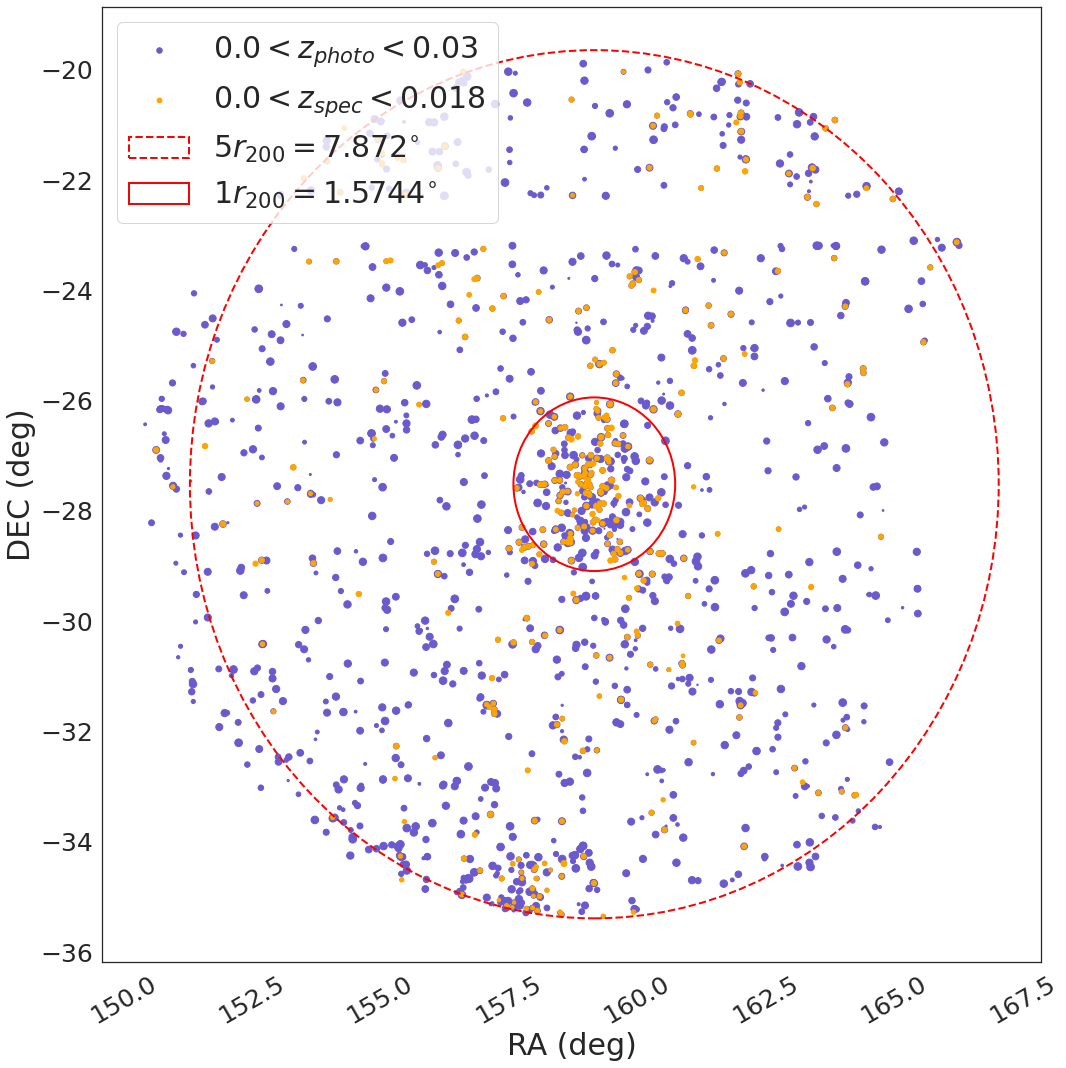

In [9]:
fig = plt.figure(figsize=(15, 15))
ax2 = fig.add_subplot(111)

mask_pz = (rpetro_pz < mlim) & (zml > 0.0) & (zml < 0.03) & (odds > odds_min) & (prob_gal > 0.8)

sc1 = ax2.scatter(x=ra_pz[mask_pz], y=dec_pz[mask_pz], cmap=cm1, s=zml[mask_pz]*2e3, 
                      label=r"$0.0 < z_{photo} < 0.03$", color='slateblue')
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)

mask_sz = (rpetro_sz < mlim) & (z > 0.005) & (z < z_range) & (probgal_sz > 0.8)

sc1 = ax2.scatter(x=ra_sz[mask_sz], y=dec_sz[mask_sz], cmap=cm2, s=z[mask_sz]*2e3, 
                      label=r"$0.0 < z_{spec} < 0.018$", color='orange')
ax2.set_ylabel("DEC (deg)", fontsize=fontsize)
ax2.set_xlabel("RA (deg)", fontsize=fontsize)
# ax2.set_title(r"r_petro $<$ {:.1f}, 0.005 $<$ spec-z $<$ {:.3f}".format(mlim, z_range), fontsize=fontsize)

FiveR200 = plt.Circle((ra_0, dec_0), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 7.872^{\circ}$')
ax2.add_patch(FiveR200)

OneR200 = plt.Circle((ra_0, dec_0), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 1.5744^{\circ}$')
ax2.add_patch(OneR200)

ax2.legend(fontsize=fontsize, loc=2)
ax2.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax2.xaxis.set_tick_params(labelsize=labelsize, width=3, rotation=30)

fig.tight_layout()
plt.savefig("../Presentations/cosmo22-splus-poster/DECxRAXphotoz&specz.png".format(mlim), format='png')